# All imports

The basic libraries, you may import more if there are present on the server's environment

In [9]:
import numpy as np
import uproot3
import pickle

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import Neutrino_functions

from math import *
import scipy as sci

# Opening the MC and data frames

# !!! Paths need to be changed when space for this experiment is allocated !!!

In [10]:
# MC
MC_file = '~/Documents/git_repos/MScproject/data/MC_EXT_flattened_1_correct.pkl'

# Data
data_file = '~/Documents/git_repos/MScproject/data/data_frame_flattened_1_correct.pkl'


# Open file as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)

# You can display the dataframe by uncommenting these lines and running the cell

In [11]:
# Uncomment these lines to display the dataframes
#pd.set_option('display.max_columns', 100)
#data.head(10)

# This command, when ran, shows you the different inputs you can give the function

You can access this function. It is present in Neutrino_functions.py. You can create your own plotting function if you wish.

In [12]:
#This command shows what input you should give the plotting function. The inputs with =None can be left out when calling the function
help(Neutrino_functions.histogram_plot)

Help on function histogram_plot in module Neutrino_functions:

histogram_plot(MC_frame, variable, bins, name, scaling, plot_data=None, logscale=None, dataFrame=None)



# Make your selections here

Modify selection cuts. Remember to cut the same variables in both data sets.

In [13]:
def Selections(frame):
    
    # Basic variables present in dataframe
    trk_start_x_v = frame['trk_sce_start_x_v']
    trk_start_y_v = frame['trk_sce_start_y_v']
    trk_start_z_v = frame['trk_sce_start_z_v']
    trk_end_x_v = frame['trk_sce_end_x_v']
    trk_end_y_v = frame['trk_sce_end_y_v']
    trk_end_z_v = frame['trk_sce_end_z_v'] 
    reco_x = frame['reco_nu_vtx_sce_x']
    reco_y = frame['reco_nu_vtx_sce_y']
    reco_z = frame['reco_nu_vtx_sce_z']
    topological = frame['topological_score']
    trk_score_v = frame['trk_score_v']
    trk_dis_v = frame['trk_distance_v']
    trk_len_v = frame['trk_len_v']

    
    
    #cat = DataSet['category']
    
    # List of [signal entries , purity , label]. Can be appended each selection cut
    #event = []
    #event.append([len(DataSet[cat==21]['evt']),len(DataSet[cat==21]['evt'])/len(DataSet['evt']),'basic'])
    
    
    # select the conditions you want to apply 
    selection =  ((trk_len_v > -1000) & (trk_len_v < 1000))
    
    # Apply selection on dataframe
    frame = frame[selection]
    
    return frame

# Check the purity and efficiency of the sample
It is recommended to plot purity and efficiency after each variable cut

# Calls the selection function on the dataframes

In [14]:
MC_EXT = Selections(MC_EXT)
data_frame = Selections(data)

# Plot all variables and decide on selection cuts

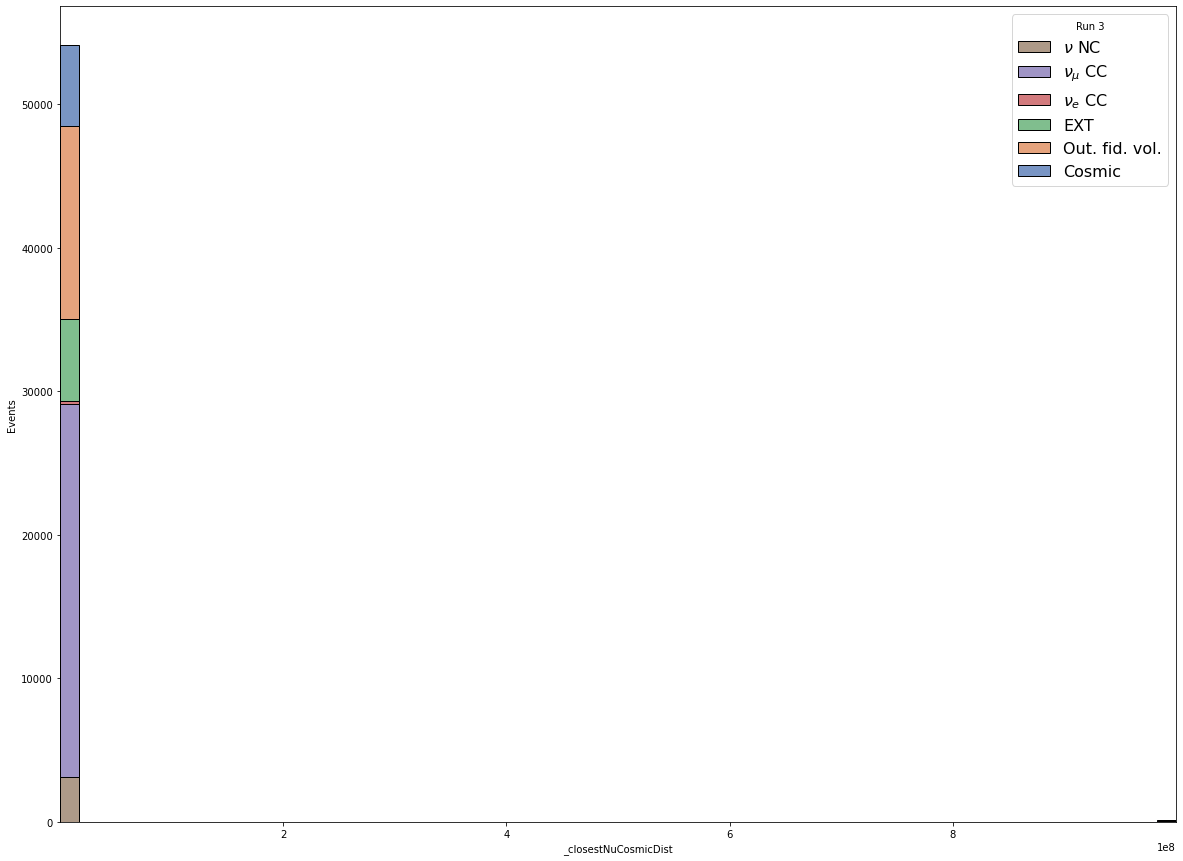

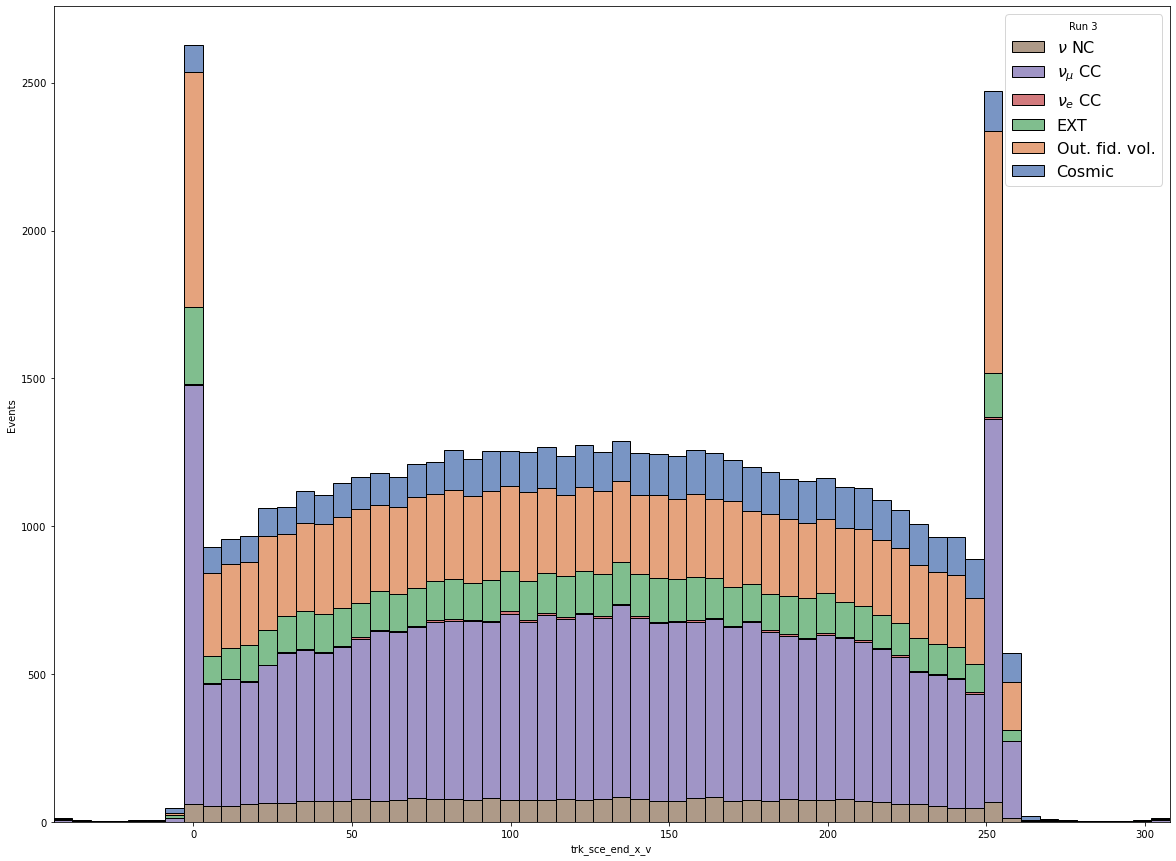

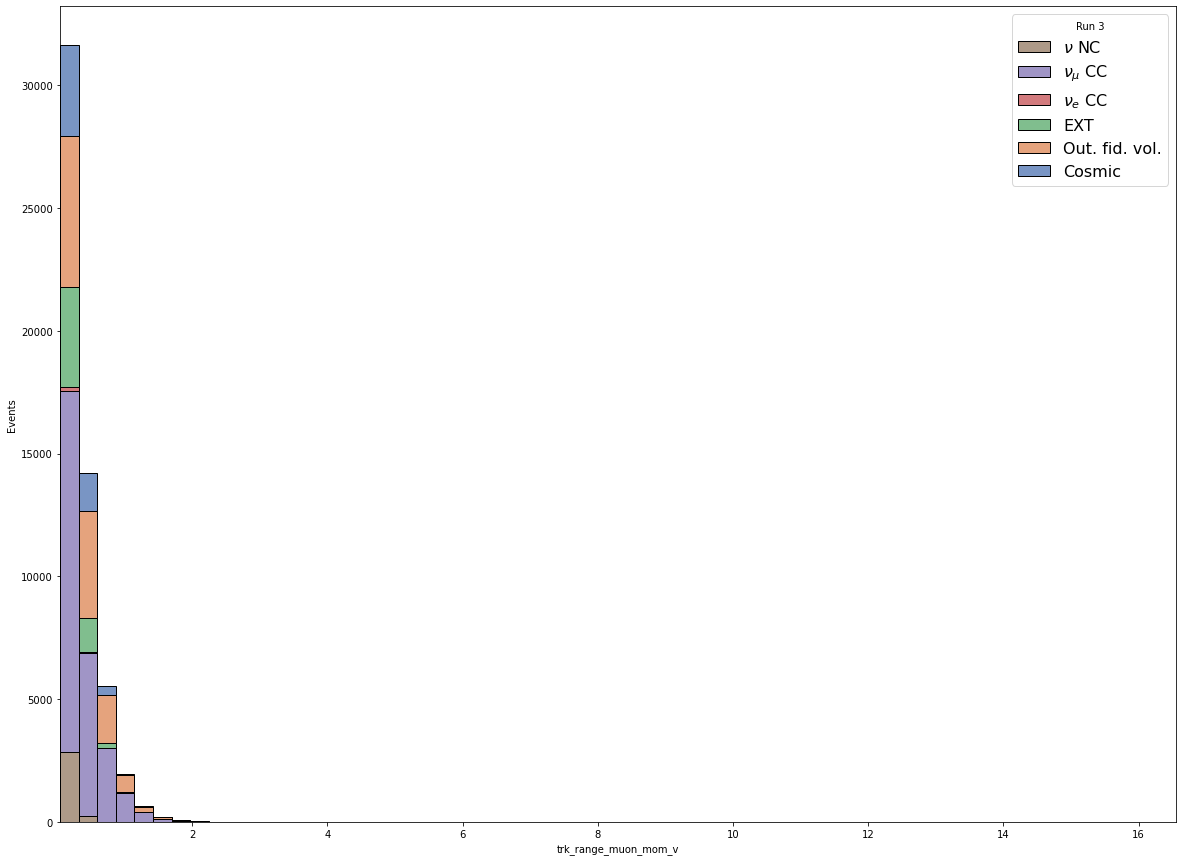

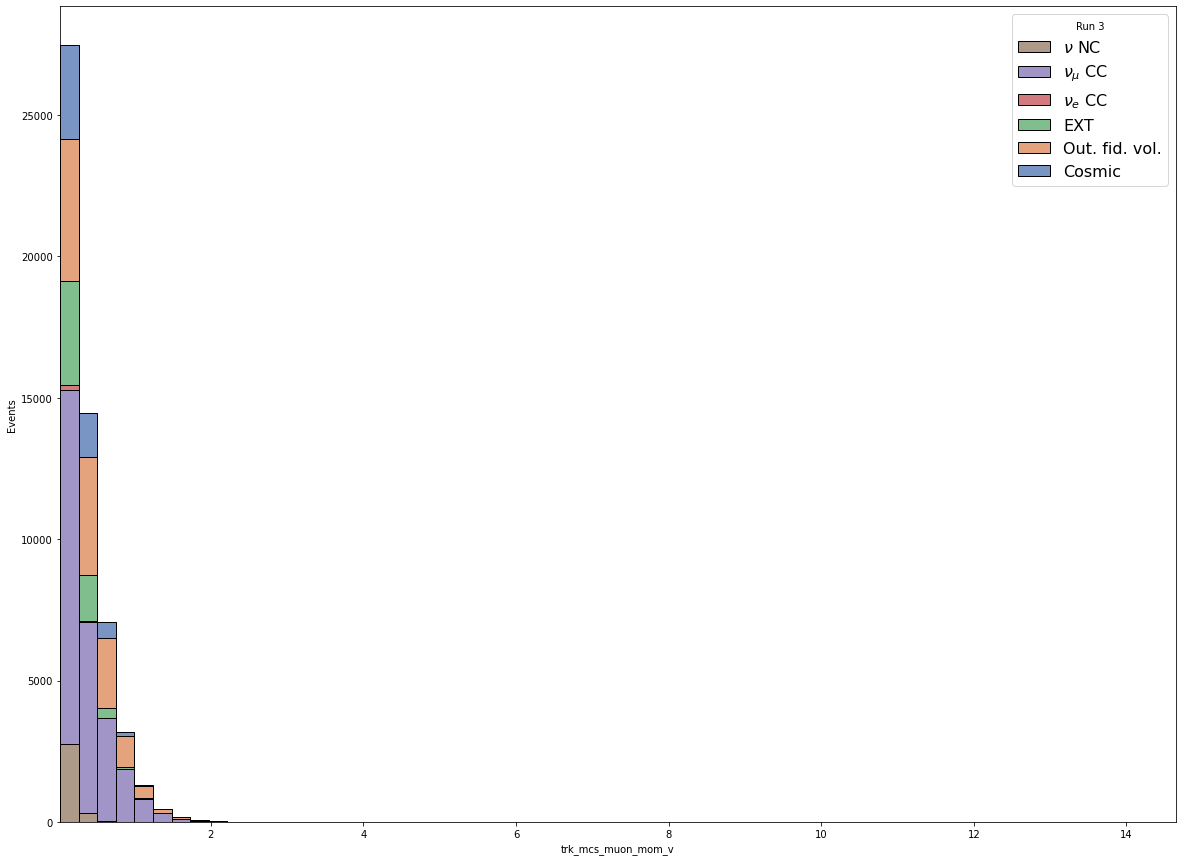

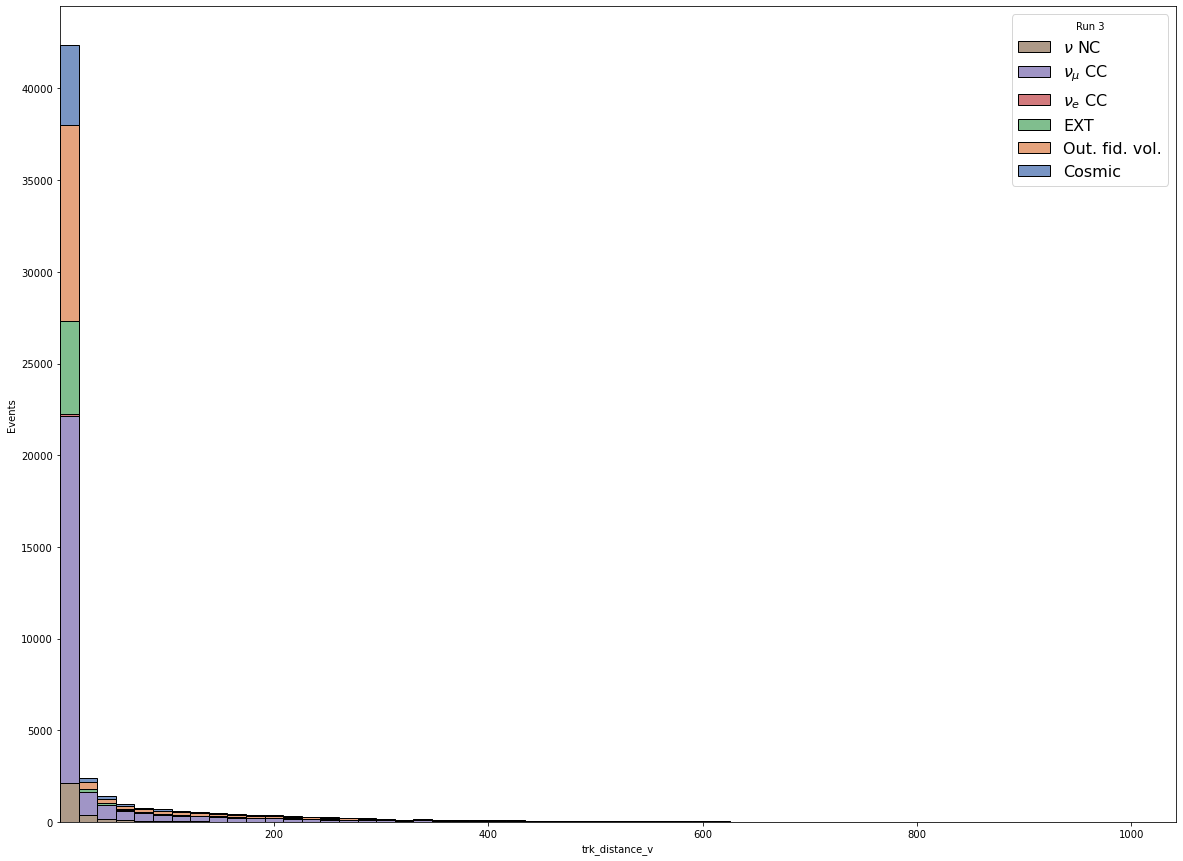

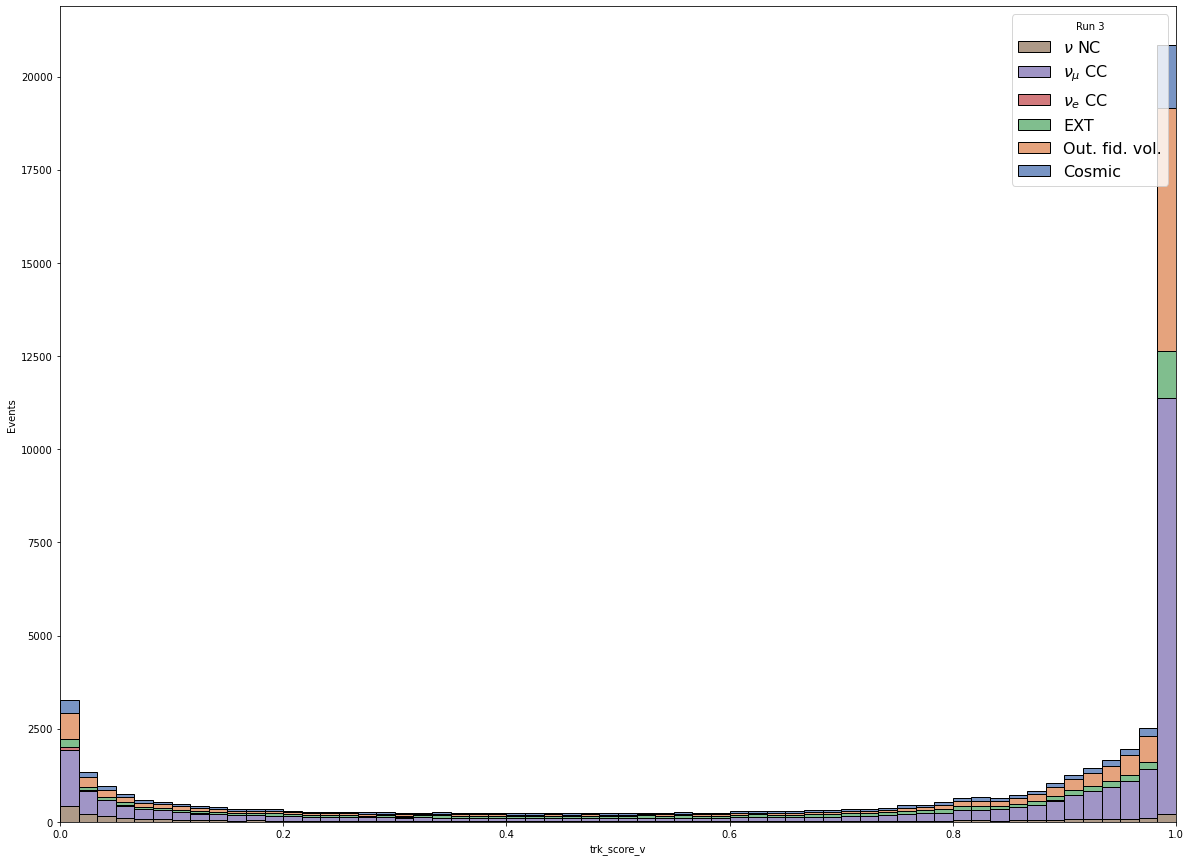

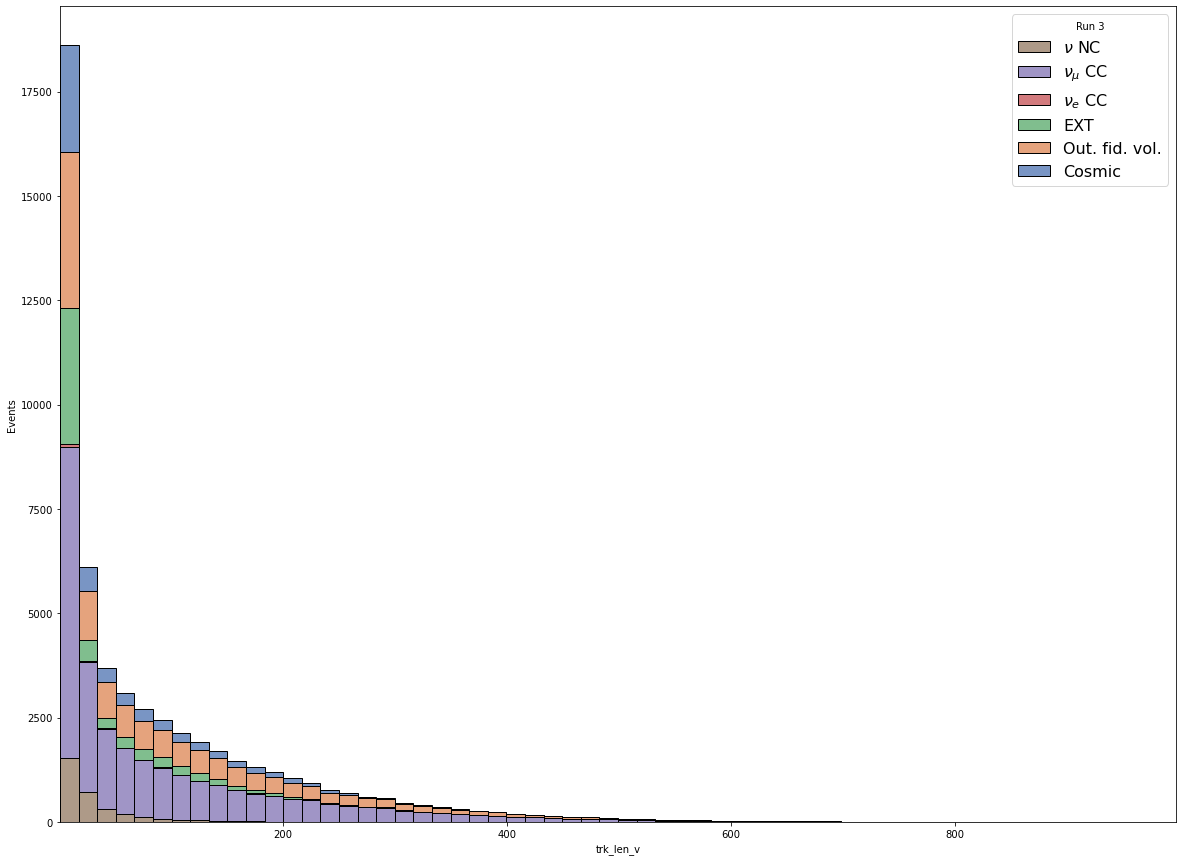

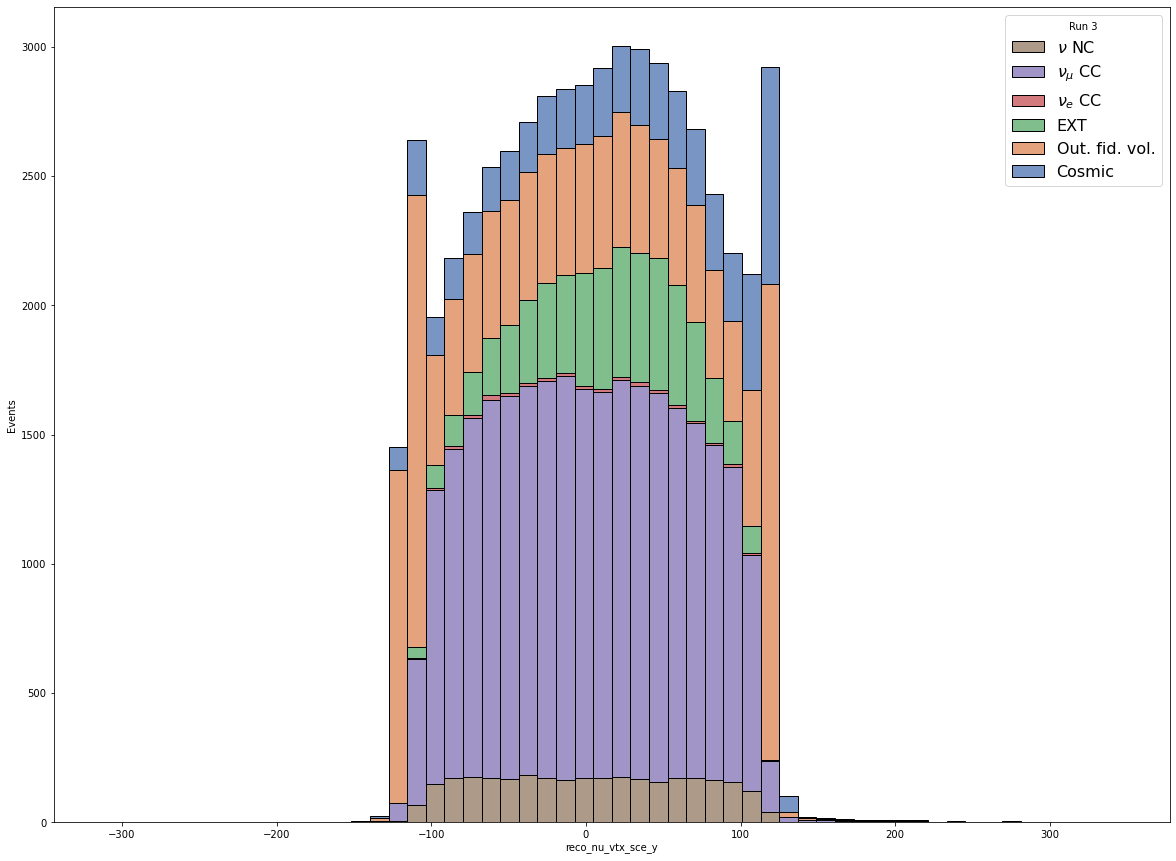

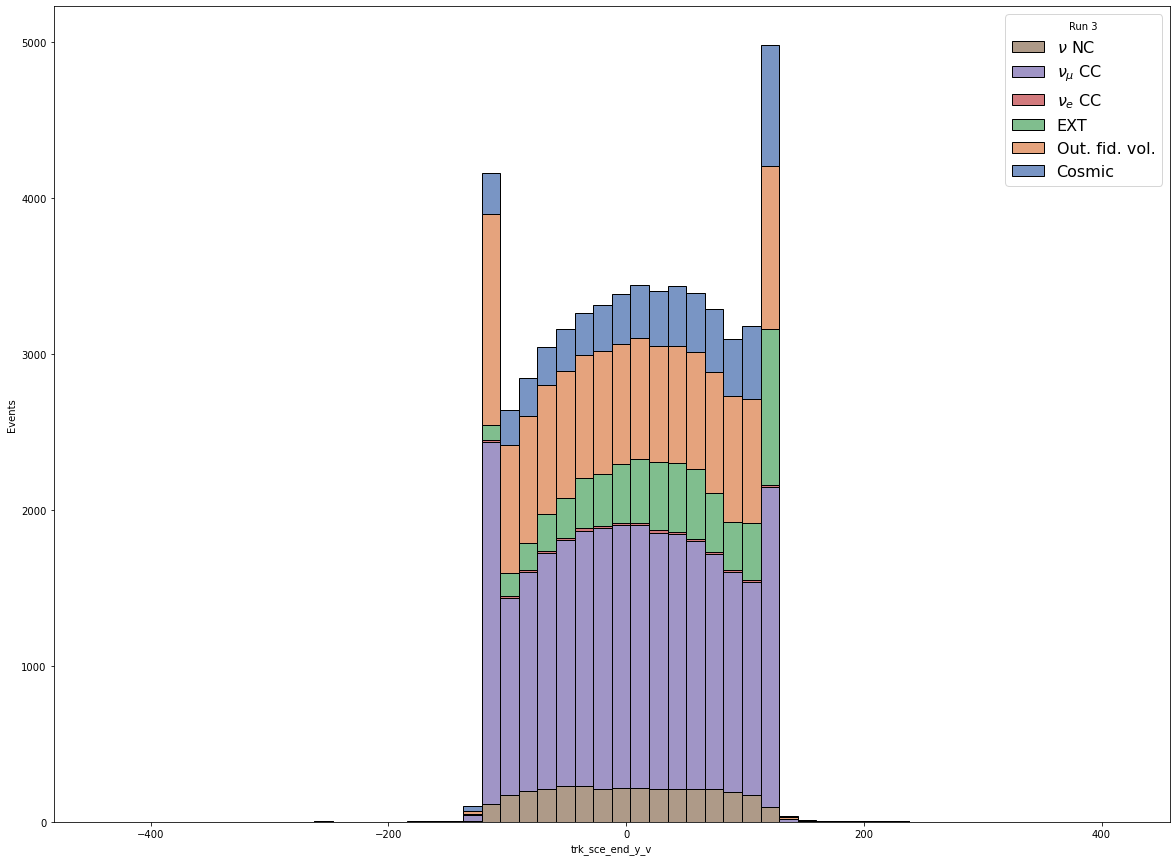

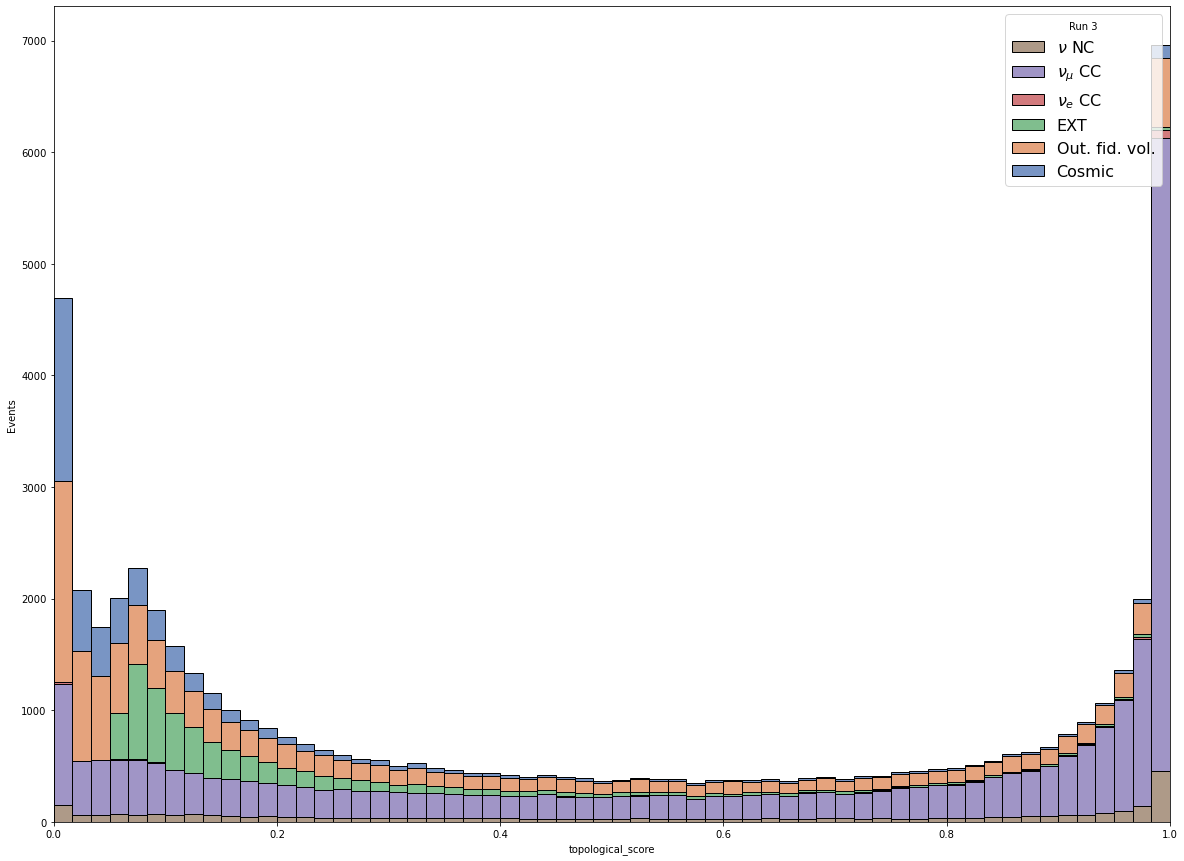

/tmp/ipykernel_18276/2730293016.py:11: UserWarning: Attempting to set identical left == right == 2 results in singular transformations; automatically expanding.
  plt.xlim([np.min(MC_EXT[item]), np.max(MC_EXT[item])])


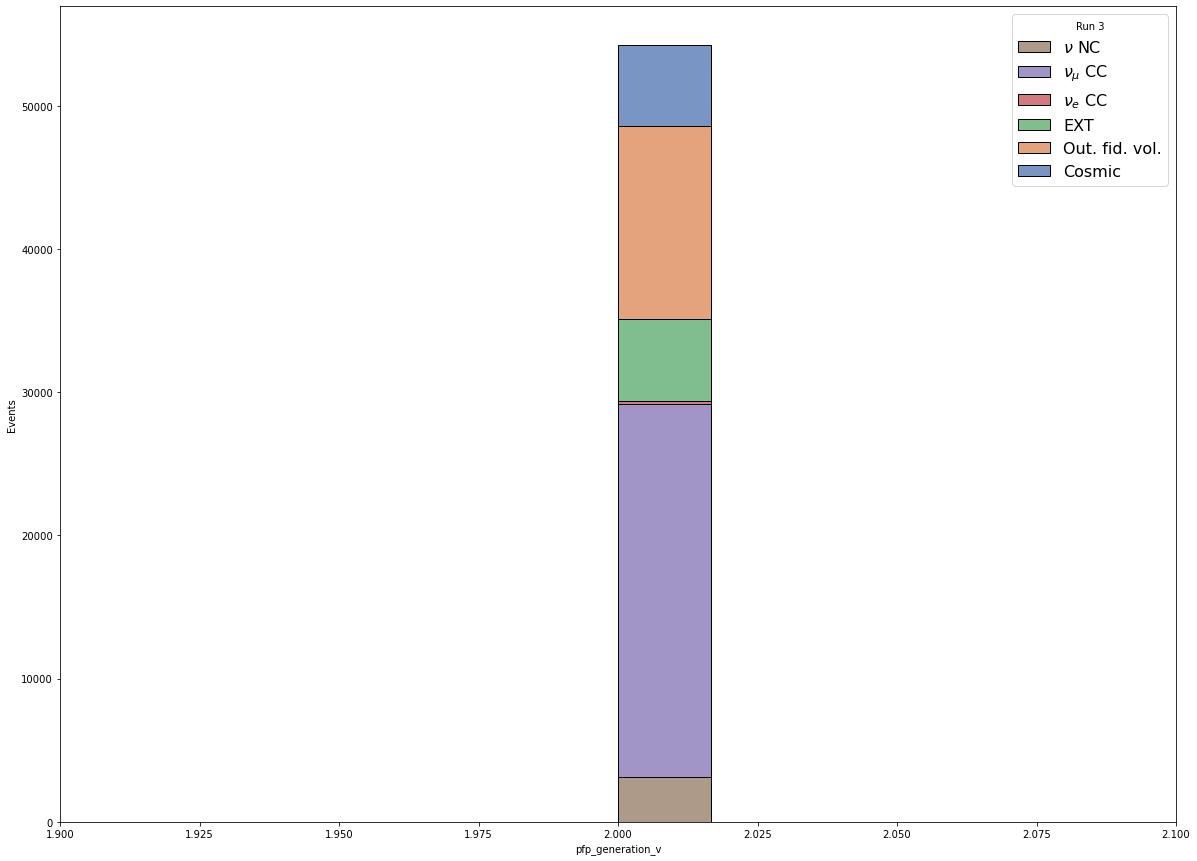

TypeError: unhashable type: 'numpy.ndarray'

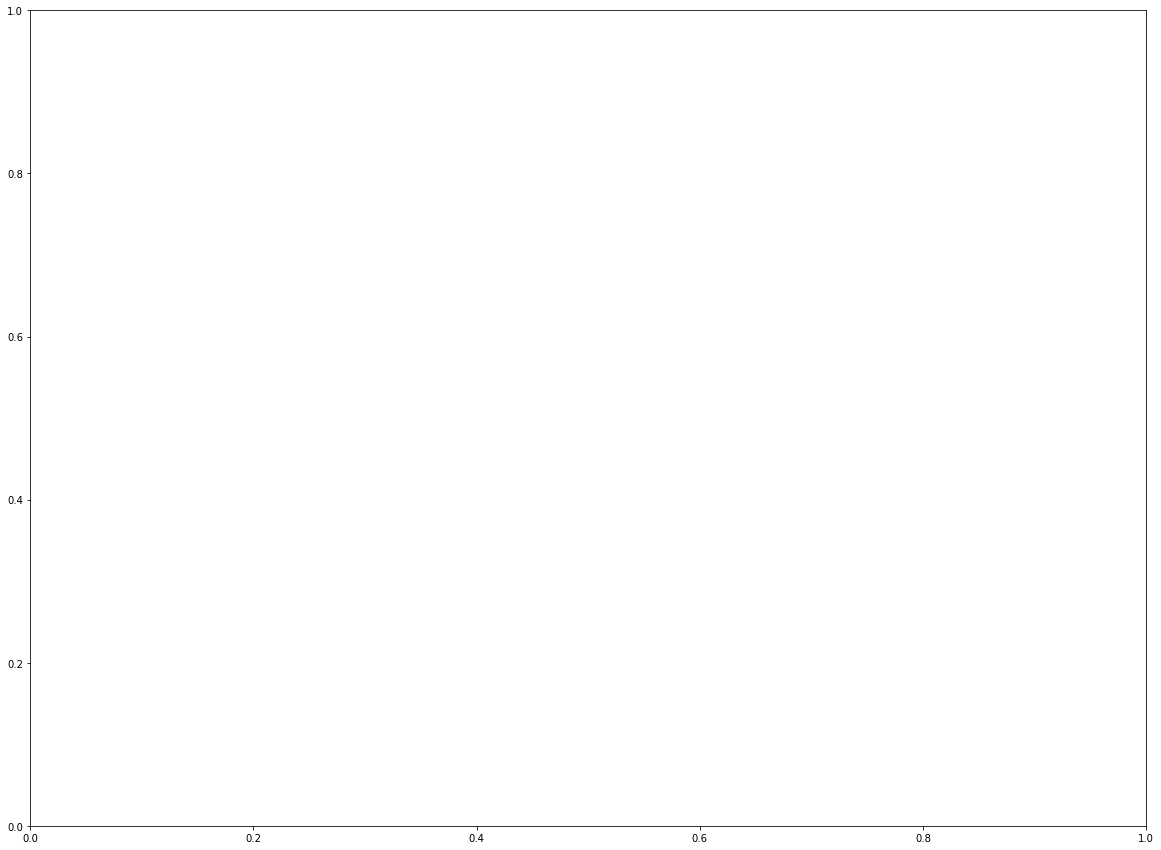

In [17]:
BIN = 60
# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT)).intersection(list(data_frame)))

for item in all_variables_to_plot:
    plt.figure(figsize=(20,15))
    i = sns.histplot(data=MC_EXT, x=item, multiple="stack", hue="category", palette = 'deep', weights = MC_EXT['weight'], bins = BIN, legend = False)
    i.set(xlabel=item, ylabel = "Events")

    #plt.yscale('log')
    plt.xlim([np.min(MC_EXT[item]), np.max(MC_EXT[item])])
    plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic"])
    plt.show(i)

# Plot the energy spectrums here and normalise

# Oscillation and fitting

### Define functions and minimise chi_square 
Write oscillation function and chi square. Apply oscillation function on MC data set and minimize chi square

# Compare your result with MINIbooNE

Results are extracted from MiniBooNE (orange) and LSND (blue)

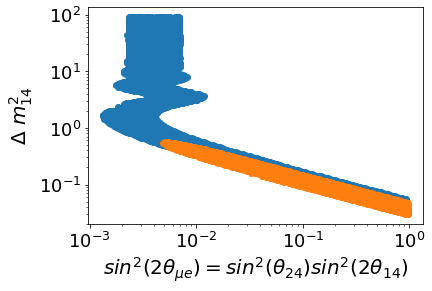

In [22]:
# Load data
LSND_data = pd.read_csv('./data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./data/DataSet_MiniBooNE.csv').to_numpy()

# Plot data
plt.plot(LSND_data[:,0],LSND_data[:,1],'o')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'o')

plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$',fontsize=20)
plt.ylabel(r'$\Delta$ $m_{14}^2$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.show()